In [1]:
# path to user functions
import sys  
sys.path.append('../Src/')

from platform import python_version

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import importlib 

# import user functions
import UserUtilityFunctions as uf
import UserStatisticalFunctions as usf
import UserVisualization as uv
import UserImputeFunctions as ui

# set seaborn theme
sns.set_theme()

# initializing variables
REMOVE = '** REMOVE ** ML Linear Regression'
RANDOM_STATE = 1776

# print versions
print("Numpy Version: " + np.__version__)
print("Pandas Version: " + pd.__version__)
print("Seaborn Version: " + sns.__version__)
print("Matplotlib Version: " + plt.matplotlib.__version__)
print("Python Version: " + python_version())

# adjust pandas display options to max
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# adjust pandas display options to ensure full display of content
pd.set_option('display.max_colwidth', None)

Numpy Version: 1.26.4
Pandas Version: 2.2.3
Seaborn Version: 0.13.2
Matplotlib Version: 3.9.2
Python Version: 3.9.20


### Import Data

In [2]:
# import data
df = pd.read_pickle("../Data/Heart_ML_Prep.pkl")
df_label = pd.read_pickle("../Data/Label_ML_Prep.pkl")
df_can = pd.read_pickle("../Data/CAN_ML_Prep.pkl")
df_don = pd.read_pickle("../Data/DON_ML_Prep.pkl")
df_both = pd.read_pickle("../Data/BOTH_ML_Prep.pkl")
df_nominal = pd.read_pickle("../Data/Nominal_ML_Prep.pkl")
df_ordinal = pd.read_pickle("../Data/Ordinal_ML_Prep.pkl")
df_numeric = pd.read_pickle("../Data/Numeric_ML_Prep.pkl")
df_object = pd.read_pickle("../Data/Object_ML_Prep.pkl")
df_date = pd.read_pickle("../Data/Date_ML_Prep.pkl")
df_dict = pd.read_pickle("../Data/Dictionary_ML_Prep.pkl")
df_drop = pd.read_pickle("../Data/Drop_ML_Prep.pkl")
df_unknown = pd.read_pickle("../Data/Unknown_ML_Prep.pkl")
df_new = pd.read_pickle("../Data/New_ML_Prep.pkl")

# checking for duplicated column name
df.columns[df.columns.duplicated()]

Index([], dtype='object')

### Feature Information

In [3]:
print(f"Heart Dataset Rows: {df.shape[0]:,} & Columns: {df.shape[1]:,}")
print(f"Label Features: {df_label.shape[0]:,}")
print(f"Candidate Features: {df_can.shape[0]:,}")
print(f"Donor Features: {df_don.shape[0]:,}")
print(f"Date Features: {df_date.shape[0]:,}")
print(f"Both Features: {df_both.shape[0]:,}")
print(f"Object Features: {df_object.shape[0]:,}")
print(f"Numeric Features: {df_numeric.shape[0]:,}")
print(f"Ordinal Features: {df_ordinal.shape[0]:,}")
print(f"Nominal Features: {df_nominal.shape[0]:,}")
print(f"Drop Features: {df_drop.shape[0]:,}")
print(f"Unknown Features: {df_unknown.shape[0]:,}")
print(f"New Features: {df_new.shape[0]:,}")

Heart Dataset Rows: 9,835 & Columns: 134
Label Features: 1
Candidate Features: 51
Donor Features: 55
Date Features: 0
Both Features: 19
Object Features: 0
Numeric Features: 41
Ordinal Features: 14
Nominal Features: 78
Drop Features: 0
Unknown Features: 0
New Features: 43


### Wrangle

#### Sanity Check

In [4]:
# initialize variables
numericCols = df_numeric.column.to_list()
nominalCols = df_nominal.column.to_list()
ordinalCols = df_ordinal.column.to_list()

# total features
print(f"Total Features: {len(numericCols) + len(nominalCols) + len(ordinalCols)}")
print(f"Total Features from DataFrame: {df.shape[1]}")

Total Features: 133
Total Features from DataFrame: 134


In [5]:
# find the difference
uf.symmetricDifference(set(df.columns.to_list()), set(numericCols + nominalCols + ordinalCols))

Symmetric difference: ['Survival']


#### Examine Label

         count unique     top  freq
Survival  9835      2  Living  5404


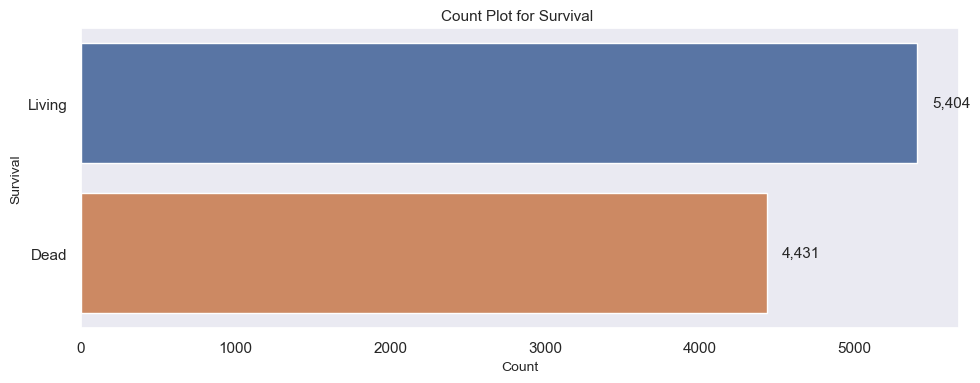

In [6]:
# label: 600 days
print(pd.DataFrame(df.Survival.describe()).T)

# plot
uv.countPlot(df, ['Survival'])

#### Examine Numeric

In [7]:
print(sorted(numericCols))

['Age_Addition', 'Age_Difference_CanDon', 'BMI_Addition', 'BMI_Difference_CanDon', 'BloodPH_DON', 'BloodUreaNitrogenLevel_DON', 'Creatinine_Addition_CAN', 'Creatinine_Difference_RT_CAN', 'Creatinine_Interaction_CAN', 'DistanceFromDonorHospitaltoTXCenter', 'HeightCm_Addition', 'HeightCm_Difference_CanDon', 'Hematocrit_DON', 'HemodynamicsRegistration_Addition_CAN', 'HemodynamicsRegistration_CO_CAN', 'HemodynamicsRegistration_Interaction_CAN', 'HemodynamicsTransplant_Addition_CAN', 'HemodynamicsTransplant_CO_CAN', 'HemodynamicsTransplant_Interaction_CAN', 'Hemodynamics_Addition_Difference_CAN', 'Hemodynamics_Difference_CO_RT_CAN', 'Hemodynamics_Difference_PA_DIA_RT_CAN', 'Hemodynamics_Difference_PA_MN_RT_CAN', 'Hemodynamics_Difference_PCW_RT_CAN', 'Hemodynamics_Difference_SYS_RT_CAN', 'Hemodynamics_Interaction_Difference_CAN', 'IschemicTimeHour_DON', 'LV_EjectionFractionPercent_DON', 'Level_SGOT_Addition_DON', 'Level_SGOT_Difference_AltAst_DON', 'LungPO2_DON', 'LungPO2_FIO2_DON', 'OrganRe

In [8]:
df[numericCols].describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
BloodUreaNitrogenLevel_DON,9835.0,26.692806,2.138106e+01,1.450000e+00,1.400000e+01,2.000000e+01,3.200000e+01,2.500000e+02
HemodynamicsRegistration_CO_CAN,9835.0,4.220671,1.295484e+00,4.500000e-01,3.300000e+00,4.100000e+00,4.950000e+00,1.353000e+01
HemodynamicsTransplant_CO_CAN,9835.0,4.453075,1.404079e+00,2.000000e-01,3.500000e+00,4.300000e+00,5.210000e+00,1.500000e+01
TotalDayWaitList_CAN,9835.0,145.832028,2.267241e+02,0.000000e+00,1.400000e+01,5.100000e+01,1.780000e+02,2.012000e+03
OrganRecovery_PCO2_DON,9835.0,39.160647,6.953709e+00,1.700000e+01,3.480000e+01,3.860000e+01,4.300000e+01,1.060000e+02
DistanceFromDonorHospitaltoTXCenter,9835.0,222.174276,2.280711e+02,0.000000e+00,3.300000e+01,1.610000e+02,3.500000e+02,2.215000e+03
Hematocrit_DON,9835.0,28.146050,4.898046e+00,2.500000e+00,2.480000e+01,2.760000e+01,3.100000e+01,6.060000e+01
IschemicTimeHour_DON,9835.0,3.268429,1.103292e+00,3.000000e-01,2.600000e+00,3.300000e+00,3.900000e+00,1.200000e+01
BloodPH_DON,9835.0,7.418054,6.802223e-02,5.570000e+00,7.380000e+00,7.420000e+00,7.460000e+00,7.930000e+00
LV_EjectionFractionPercent_DON,9835.0,61.620125,6.599471e+00,1.000000e+01,5.600000e+01,6.000000e+01,6.500000e+01,9.100000e+01


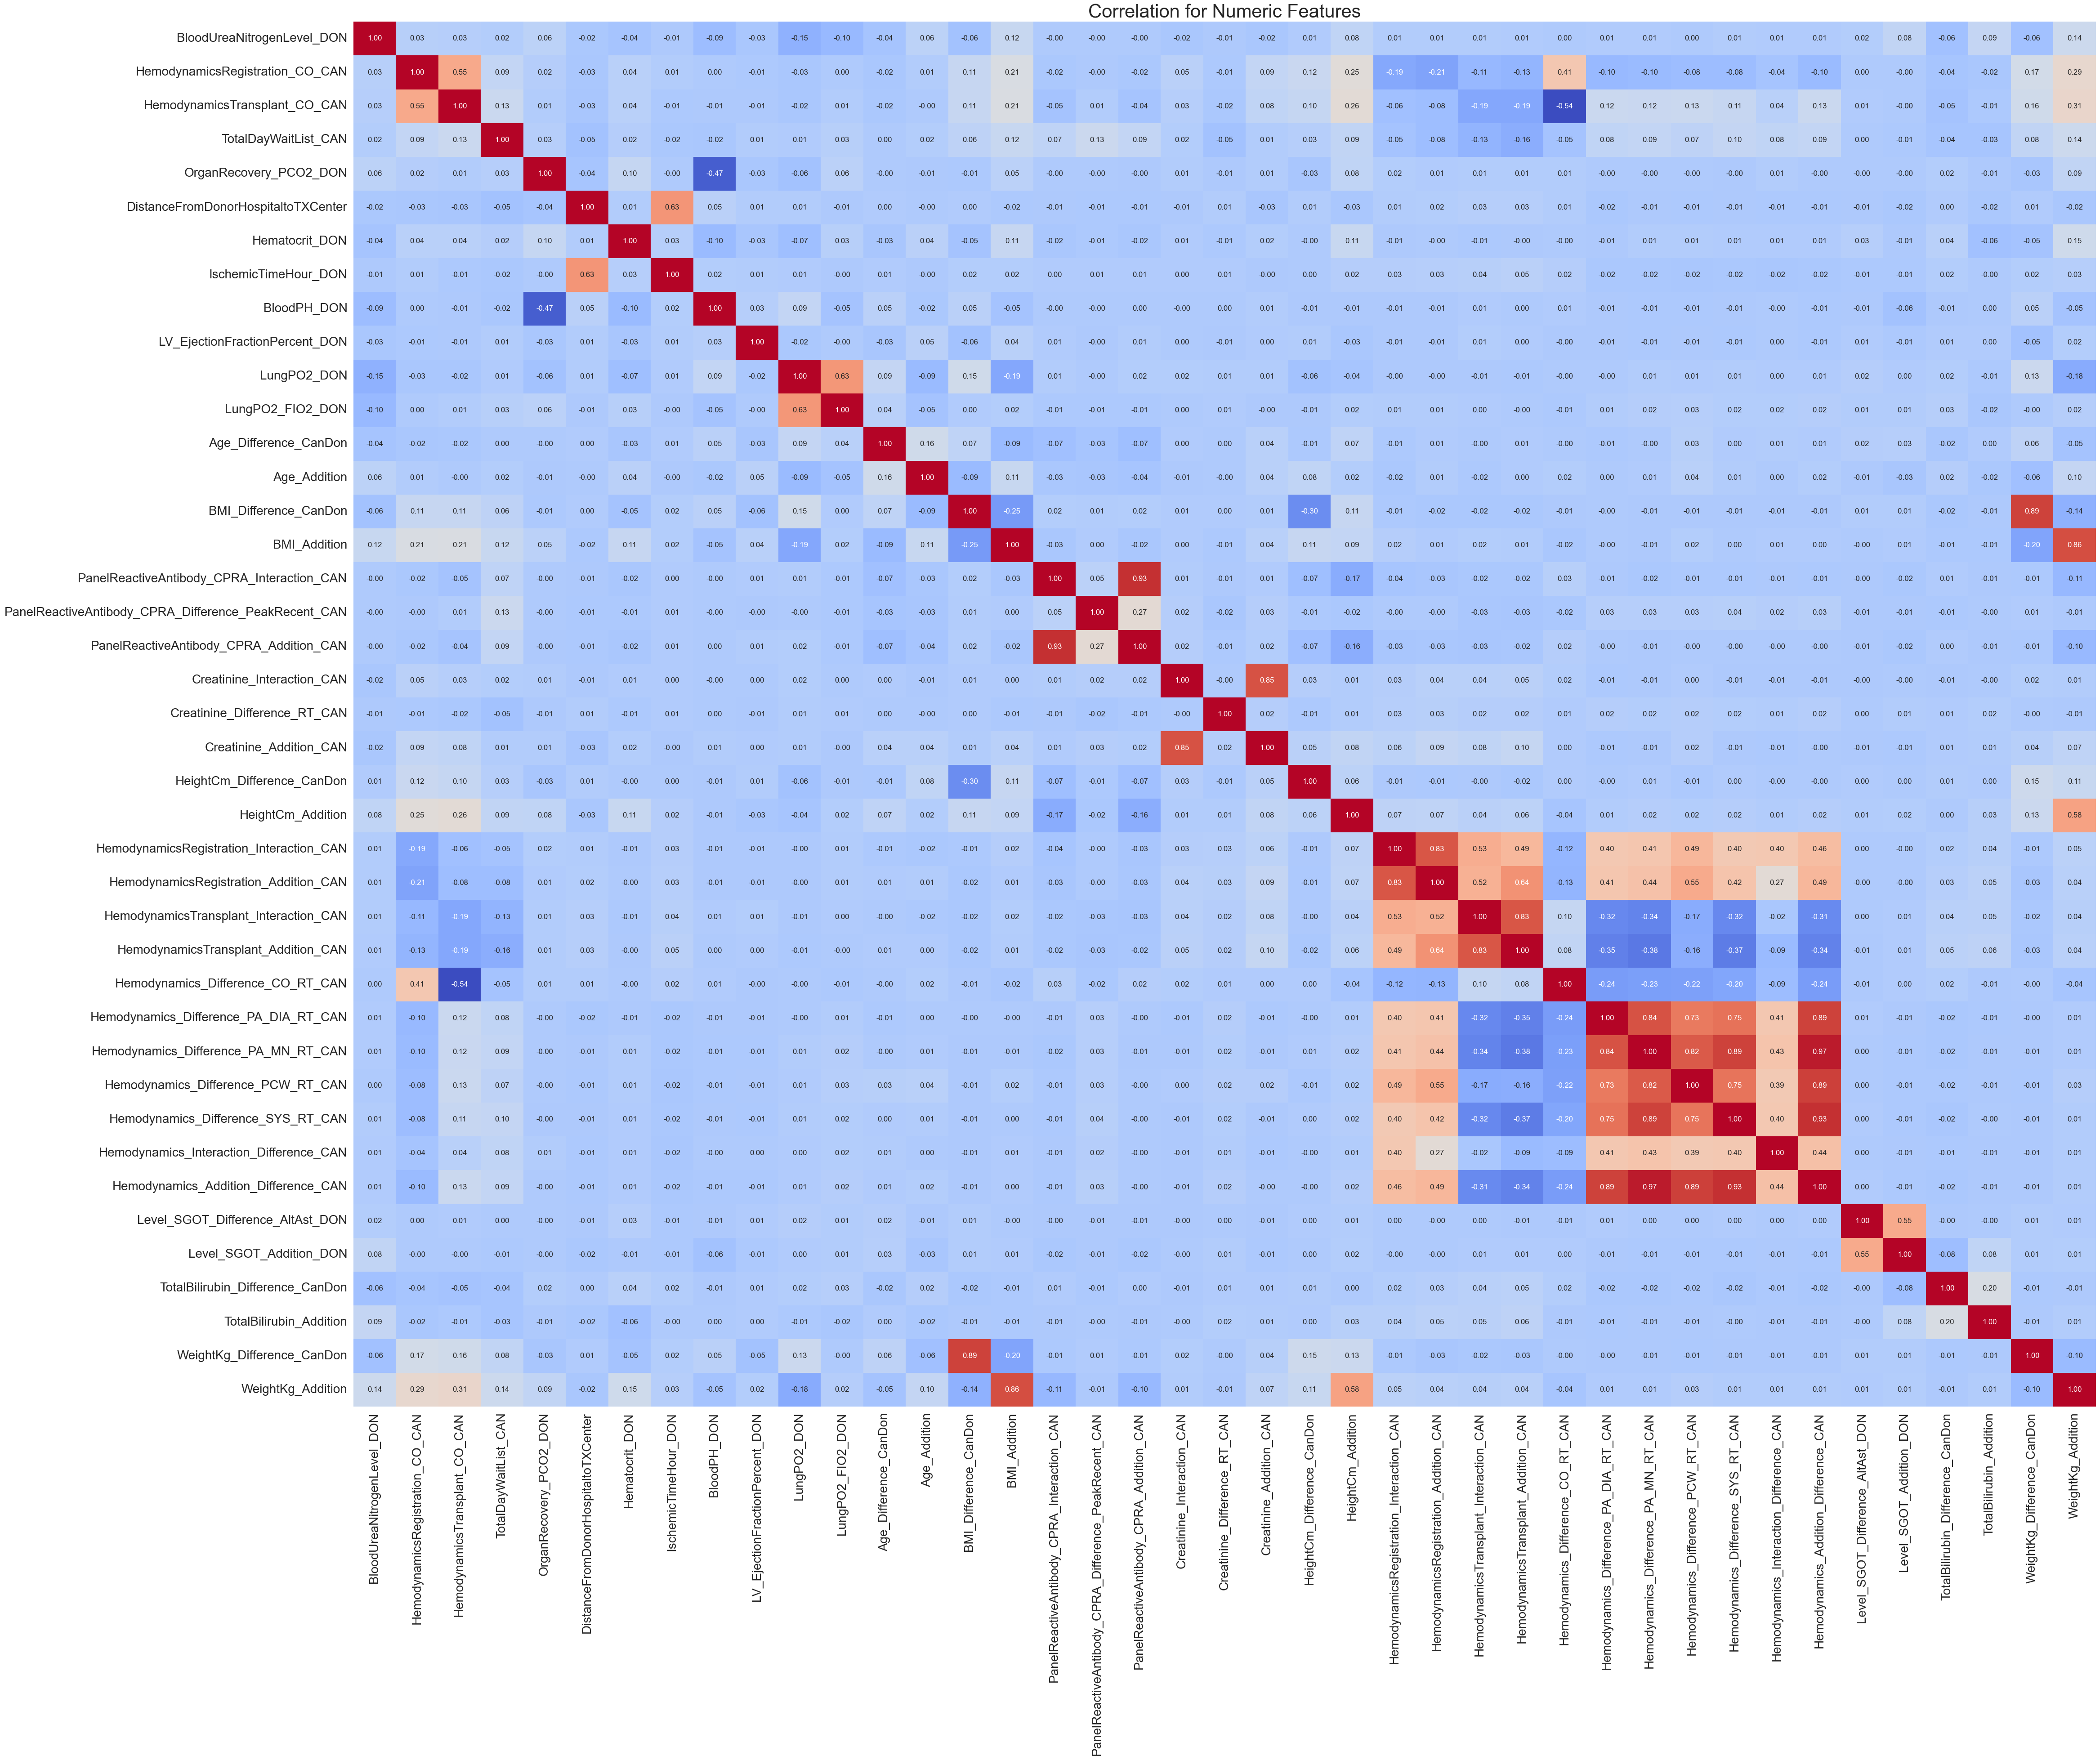

In [9]:
plt.figure(figsize=(50,40))
sns.heatmap(df[numericCols].corr(), annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
plt.title("Correlation for Numeric Features", fontsize=30)
# Adjust the font size of the ticks
plt.xticks(fontsize=20)  # font size for x-ticks
plt.yticks(fontsize=20)  # font size for y-ticks
plt.show()

#### Examine Ordinal

In [10]:
from sklearn.preprocessing import OrdinalEncoder

In [11]:
print(sorted(ordinalCols))

['Antigen_Combine_Count_CAN', 'Bronchoscopy_Count_DON', 'Dialysis_Combine_Count_CAN', 'Drug_Combine_Count_DON', 'EducationLevel_CAN', 'FunctionalStatusTransplant_CAN', 'Infection_Combine_Count_DON', 'Intropes_Combine_Count_CAN', 'MedicalConditionTransplant_CAN', 'MismatchLevel_Combine_Count', 'PreviousTransplantNumber_CAN', 'PriorCardiacSurgery_Combine_Count_CAN', 'TransfusionNumber_DON', 'WorkIncome_Combine_Count_CAN']


In [12]:
df[ordinalCols].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PreviousTransplantNumber_CAN,9835.0,NaN,NaN,NaN,0.031113,0.184975,0.0,0.0,0.0,0.0,2.0
EducationLevel_CAN,9835,7,HIGH SCHOOL (9-12) or GED,3565,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FunctionalStatusTransplant_CAN,9835,11,"20% - Very sick, hospitalization necessary: active treatment necessary",3166,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MedicalConditionTransplant_CAN,9835,3,Not Hospitalized,4311,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TransfusionNumber_DON,9835,4,NONE,5041,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Antigen_Combine_Count_CAN,9835.0,NaN,NaN,NaN,9.260803,5.108006,0.0,6.0,6.0,15.0,18.0
Bronchoscopy_Count_DON,9835.0,NaN,NaN,NaN,0.251246,0.619342,0.0,0.0,0.0,0.0,2.0
Drug_Combine_Count_DON,9835.0,NaN,NaN,NaN,1.504525,1.36967,0.0,0.0,2.0,2.0,4.0
Dialysis_Combine_Count_CAN,9835.0,NaN,NaN,NaN,0.095577,0.418962,0.0,0.0,0.0,0.0,2.0
Infection_Combine_Count_DON,9835.0,NaN,NaN,NaN,1.823488,1.051045,0.0,2.0,2.0,2.0,5.0


##### Antigen_Combine_Count_CAN

In [13]:
# display
df.Antigen_Combine_Count_CAN.unique()

array([13,  6, 14,  5,  0, 15,  4, 12, 11,  9,  8,  3, 10,  7,  2, 18, 16,
       17])

##### Bronchoscopy_Count_DON

In [14]:
# display
df.Bronchoscopy_Count_DON.unique()

array([0, 2, 1])

##### Dialysis_Combine_Count_CAN

In [15]:
# display
df.Dialysis_Combine_Count_CAN.unique()

array([0, 2, 1])

##### Drug_Combine_Count_DON

In [16]:
# display
df.Drug_Combine_Count_DON.unique()

array([1, 0, 4, 2, 3])

##### EducationLevel_CAN

In [17]:
# display
df.EducationLevel_CAN.unique()

array(['ASSOCIATE/BACHELOR DEGREE', 'POST-COLLEGE GRADUATE DEGREE',
       'HIGH SCHOOL (9-12) or GED', 'ATTENDED COLLEGE/TECHNICAL SCHOOL',
       'UNKNOWN', 'GRADE SCHOOL (0-8)', 'NONE'], dtype=object)

In [18]:
# order
ordering = [['NONE', 'UNKNOWN', 'GRADE SCHOOL (0-8)', 'HIGH SCHOOL (9-12) or GED', 'ATTENDED COLLEGE/TECHNICAL SCHOOL', 'ASSOCIATE/BACHELOR DEGREE', 'POST-COLLEGE GRADUATE DEGREE']]

# initialize Ordinal encoder
encoder = OrdinalEncoder(categories=ordering)

# apply encoding
df['EducationLevel_CAN'] = encoder.fit_transform(df[['EducationLevel_CAN']])

##### FunctionalStatusRegistration_CAN

In [19]:
# display
df.FunctionalStatusTransplant_CAN.unique()

array(['30% - Severely disabled: hospitalization is indicated, death not imminent',
       '20% - Very sick, hospitalization necessary: active treatment necessary',
       '10% - Moribund, fatal processes progressing rapidly',
       '50% - Requires considerable assistance and frequent medical care',
       '40% - Disabled: requires special care and assistance', 'Unknown',
       '70% - Cares for self: unable to carry on normal activity or active work',
       '60% - Requires occasional assistance but is able to care for needs',
       '80% - Normal activity with effort: some symptoms of disease',
       '90% - Able to carry on normal activity: minor symptoms of disease',
       '100% - Normal, no complaints, no evidence of disease'],
      dtype=object)

In [20]:
# sort the list, placing "Unknown" first
ordering = ['Unknown'] + sorted(
    [status for status in df.FunctionalStatusTransplant_CAN.unique().tolist() if status != 'Unknown'],
    key=lambda x: int(x.split('%')[0])
)
print(ordering)

['Unknown', '10% - Moribund, fatal processes progressing rapidly', '20% - Very sick, hospitalization necessary: active treatment necessary', '30% - Severely disabled: hospitalization is indicated, death not imminent', '40% - Disabled: requires special care and assistance', '50% - Requires considerable assistance and frequent medical care', '60% - Requires occasional assistance but is able to care for needs', '70% - Cares for self: unable to carry on normal activity or active work', '80% - Normal activity with effort: some symptoms of disease', '90% - Able to carry on normal activity: minor symptoms of disease', '100% - Normal, no complaints, no evidence of disease']


In [21]:
# initialize Ordinal encoder
encoder = OrdinalEncoder(categories=[ordering])

# apply encoding
df['FunctionalStatusTransplant_CAN'] = encoder.fit_transform(df[['FunctionalStatusTransplant_CAN']])

#### Infection_Combine_Count_DON

In [22]:
# display
df.Drug_Combine_Count_DON.unique()

array([1, 0, 4, 2, 3])

##### Intropes_Combine_Count_CAN

In [23]:
# display
df.Intropes_Combine_Count_CAN.unique()

array([ 0,  2, 12, 10,  5,  6,  7, 11,  1,  3,  8,  4,  9])

##### MedicalConditionTransplant_CAN

In [24]:
# display
df.MedicalConditionTransplant_CAN.unique()

array(['Not Hospitalized', 'In Intensive Care Unit',
       'Hospitalized Not in ICU'], dtype=object)

In [25]:
# order
ordering = [['Not Hospitalized', 'Hospitalized Not in ICU', 'In Intensive Care Unit']]

# initialize Ordinal encoder
encoder = OrdinalEncoder(categories=ordering)

# apply encoding
df['MedicalConditionTransplant_CAN'] = encoder.fit_transform(df[['MedicalConditionTransplant_CAN']])

##### MismatchLevel_Combine_Count

In [26]:
# display
df.MismatchLevel_Combine_Count.unique()

array([4, 0, 3, 2, 1])

##### PreviousTransplantNumber_CAN

In [27]:
# display
df.PreviousTransplantNumber_CAN.unique()

array([0, 1, 2])

##### PriorCardiacSurgery_Combine_Count_CAN

In [28]:
# display
df.PriorCardiacSurgery_Combine_Count_CAN.unique()

array([0, 1, 2])

##### TransfusionNumber_DON

In [29]:
# display
df.TransfusionNumber_DON.unique()

array(['NONE', '1 - 5', 'GREATER THAN 10', '6 - 10'], dtype=object)

In [30]:
# order
ordering = [['NONE', '1 - 5', '6 - 10', 'GREATER THAN 10']]

# initialize Ordinal encoder
encoder = OrdinalEncoder(categories=ordering)

# apply encoding
df['TransfusionNumber_DON'] = encoder.fit_transform(df[['TransfusionNumber_DON']])

##### WorkIncome_Combine_Count_CAN

In [31]:
# display
df.WorkIncome_Combine_Count_CAN.unique()

array([0, 1, 2])

#### Examine Nominal

In [32]:
print(sorted(nominalCols))

['AllocationType_DON', 'AntiHypertensive_DON', 'AntibodyResultHBSAB_DON', 'AntibodyResultRPR_VDRL_DON', 'Antibody_HEP_C_DON', 'AntigenDA2_DON', 'AntigenDB2_DON', 'AntigenDR2_DON', 'ArginnieManagement_DON', 'BloodGroupMatchLevel', 'CMVStatus_Transplant_CAN', 'Cancer_Combined_DON', 'CardiacArrest_DON', 'CauseOfDeath_DON', 'CerebroVascularDisease_CAN', 'ChestXray_DON', 'CigaretteHistory_DON', 'CigaretteUse_CAN', 'Citizenship_CAN', 'Citizenship_DON', 'CoronaryAngiogram_DON', 'CrossMatchDone', 'DeceasedRetyped_DON', 'DefibrillatorImplantRegistration_CAN', 'Diabetes_CAN', 'Diabetes_DON', 'Diuretics_DON', 'EpsteinBarrSeroStatusTransplant_CAN', 'EpsteinBarr_IGG_DON', 'EpsteinBarr_IGM_DON', 'Ethnicity_CAN', 'Ethnicity_DON', 'FunctionalStatus_Difference_CAN', 'Gender_Difference', 'HBV_NAT_Result_CAN', 'HBV_NAT_Result_DON', 'HCV_NAT_PreTranspant_CAN', 'HCV_NAT_Result_DON', 'HEP_C_SerostatusStatus_CAN', 'HIV_NAT_PreTransplant_CAN', 'HIV_Risk_DON', 'HIV_SeroStatusTransplant_CAN', 'HeartProcedureTyp

In [33]:
df[nominalCols].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
BloodGroupMatchLevel,9835,2,Identical,8404,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InotropicAgent_DON,9835,7,Missing,6433,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HeavyAlcoholUse_DON,9835,3,No,7838,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AntiHypertensive_DON,9835,2,No,6385,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ArginnieManagement_DON,9835,2,Yes,6960,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PrimaryDiagnosisType_CAN,9835,34,DILATED MYOPATHY: IDIOPATHIC,3487,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CauseOfDeath_DON,9835,5,ANOXIA,4157,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InfectionTherapyIV_CAN,9835,4,No,8889,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AntigenDR2_DON,9835,3,Positive,9316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Citizenship_CAN,9835,4,US Citizen,9452,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# function to find binary category features
def findBinaryCategoryFeatures(data):
    binary_features = []
    for column in data.columns:
        if data[column].nunique() == 2:
            binary_features.append(column)
    return binary_features

In [35]:
# get all binary nominal cols
binaryCols = findBinaryCategoryFeatures(df[nominalCols])

In [36]:
# display
for binaryCol in binaryCols:
    print(f"{binaryCol} & {df[binaryCol].unique()}")

BloodGroupMatchLevel & ['Compatible' 'Identical']
AntiHypertensive_DON & ['No' 'Yes']
ArginnieManagement_DON & ['No' 'Yes']
Malignancy_CAN & ['No' 'Yes']
CigaretteUse_CAN & ['Yes' 'No']
VentilatorRegistration_CAN & ['No' 'Yes']
VentilatorTransplant_CAN & ['No' 'Yes']
HCV_NAT_Result_DON & ['Negative' 'Positive']
Antibody_HEP_C_DON & ['Negative' 'Positive']
HIV_Risk_DON & ['No' 'Yes']
DeceasedRetyped_DON & ['Yes' 'No']
CrossMatchDone & ['Yes' 'No']
NonHeartBeating_DON & ['No' 'Yes']
Diuretics_DON & ['No' 'Yes']
ThyroxineT4_DON & ['Yes' 'No']
PulmonaryCatheter_DON & ['No' 'Yes']
SynthicAntiDiureticHormone_DON & ['Yes' 'No']
KidneyAllocation_DON & ['No' 'Yes']
HeparinManagement_DON & ['No' 'Yes']
InsulinManagement_DON & ['Yes' 'No']
LV_EjectionFractionMedthod_DON & ['Echo' 'Angiogram']
Gender_Difference & [0 1]
LifeSupport_Combined_CAN & ['Yes' 'No']
FunctionalStatus_Difference_CAN & [0 1]


In [37]:
def reMapCol(value):
    if value in ['Compatible', 'No', 'Negative', 'Angiogram', 0]:
        return 0
    else:
        return 1

In [38]:
# apply mapping function
for binaryCol in binaryCols:
    df[binaryCol] = df[binaryCol].apply(reMapCol).fillna(df[binaryCol])

# display
for binaryCol in binaryCols:
    print(f"{binaryCol} & {df[binaryCol].unique()}")


BloodGroupMatchLevel & [0 1]
AntiHypertensive_DON & [0 1]
ArginnieManagement_DON & [0 1]
Malignancy_CAN & [0 1]
CigaretteUse_CAN & [1 0]
VentilatorRegistration_CAN & [0 1]
VentilatorTransplant_CAN & [0 1]
HCV_NAT_Result_DON & [0 1]
Antibody_HEP_C_DON & [0 1]
HIV_Risk_DON & [0 1]
DeceasedRetyped_DON & [1 0]
CrossMatchDone & [1 0]
NonHeartBeating_DON & [0 1]
Diuretics_DON & [0 1]
ThyroxineT4_DON & [1 0]
PulmonaryCatheter_DON & [0 1]
SynthicAntiDiureticHormone_DON & [1 0]
KidneyAllocation_DON & [0 1]
HeparinManagement_DON & [0 1]
InsulinManagement_DON & [1 0]
LV_EjectionFractionMedthod_DON & [1 0]
Gender_Difference & [0 1]
LifeSupport_Combined_CAN & [1 0]
FunctionalStatus_Difference_CAN & [0 1]


In [39]:
# find the difference
newNominalCols = list(set(nominalCols) - set(binaryCols))
print(newNominalCols)

['AntigenDR2_DON', 'CerebroVascularDisease_CAN', 'Diabetes_CAN', 'StatusAtTransplant_CAN', 'CauseOfDeath_DON', 'PriorLungSurgeryAfterRegistration_CAN', 'ChestXray_DON', 'HEP_C_SerostatusStatus_CAN', 'TransplantRegion', 'SteroidsUse_CAN', 'CardiacArrest_DON', 'SurfaceHBVAntibodyTotalTransplant_CAN', 'Cancer_Combined_DON', 'SerologyAntiCMV_DON', 'CigaretteHistory_DON', 'HeartProcedureType_CAN', 'Citizenship_DON', 'Diabetes_DON', 'TransfusionAfterRegistration_CAN', 'CoronaryAngiogram_DON', 'CMVStatus_Transplant_CAN', 'Vasodilators_DON', 'AntigenDA2_DON', 'Tatoos_DON', 'DefibrillatorImplantRegistration_CAN', 'HIV_NAT_PreTransplant_CAN', 'Citizenship_CAN', 'EpsteinBarr_IGM_DON', 'Ethnicity_CAN', 'AllocationType_DON', 'UrinePortein_DON', 'HypertensionHistory_DON', 'InotropicAgent_DON', 'HCV_NAT_PreTranspant_CAN', 'AntibodyResultRPR_VDRL_DON', 'EpsteinBarrSeroStatusTransplant_CAN', 'HBV_NAT_Result_DON', 'Ethnicity_DON', 'HIV_SeroStatusTransplant_CAN', 'HeavyAlcoholUse_DON', 'AntigenDB2_DON', 

In [40]:
# dummy nominal encoding 
df_encoded = pd.get_dummies(df, columns = newNominalCols, drop_first=True)

#### Split X & y

In [41]:
# split X & y
X = df_encoded.drop(columns='Survival')
y = df_encoded.Survival

# convert all X values to float
X = X.astype('float')

### Save

In [42]:
# heart dataset
uf.writeToFile(X, 'X_dependent',path='../Data/', format='pkl')
uf.writeToFile(y, 'y_label',path='../Data/', format='pkl')

9,835 records written to ../Data/X_dependent.pkl
9,835 records written to ../Data/y_label.pkl
